# ***SIP LAB 6***
Krisha Chemburkar

I012

B1 Batch

Semester IV

BTech AI

# ***Aim:***

    a. Implement suitable frequency domain Butterworth filter to blur the given test image

    b. Change the filter order and summarize your findings when the filter order increases

In [1]:
#importing the required libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
#reading the image
img = cv2.imread("/content/Fig0333(a)(test_pattern_blurring_orig).tif", 0)

In [3]:
#finding the images fft
img_fft = np.fft.fft2(img, s = None, axes=(-2,-1), norm = None)
img_fft=np.fft.fftshift(img_fft)  #shifting it

Text(0.5, 1.0, 'Original Image')

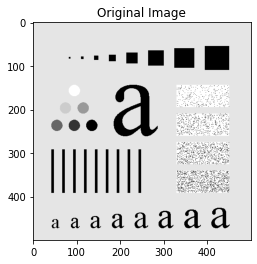

In [4]:
#displaying the original image
plt.imshow(img, cmap="gray")
plt.title("Original Image")

In [5]:
#finding the images shape
img.shape

(500, 500)

## ***Ideal Filtering***

In [6]:
m=n=500
lpf = np.zeros((m,n))   #to store low pass filtered image
hpf = np.zeros((m,n))   #to store high pass filtered image

In [7]:
d0 = int(input("value of radius: "))
for i in range(m):
  for j in range(n):
    d = np.sqrt(((i-(m/2))**2)+((j-(n/2))**2))    #calculating distance from centre
    if d>d0:
      lpf[i][j]=0
      hpf[i][j]=1
    else:
      lpf[i][j]=1
      hpf[i][j]=0
    

value of radius: 60


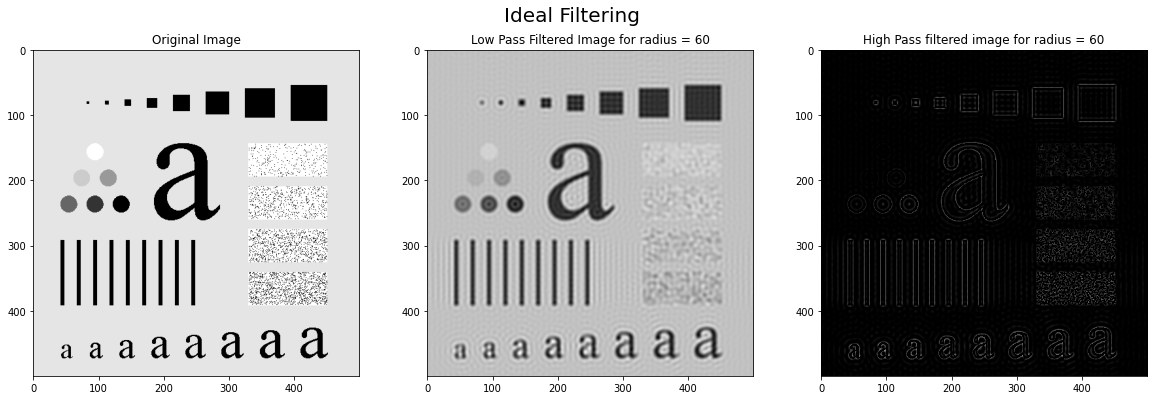

In [8]:
img_lpf= img_fft*lpf    
img_lpf= np.fft.fftshift(img_lpf)
img_new_lpf= np.real(np.fft.ifft2(img_lpf))   #reshifting the image to find the result

img_hpf= img_fft*hpf 
img_hpf= np.fft.fftshift(img_hpf)
img_new_hpf= np.real(np.fft.ifft2(img_hpf))

#displaying the results
plt.figure(figsize=(20,6))
plt.suptitle('Ideal Filtering', fontsize=20)
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")
plt.subplot(1,3,2)
plt.title("Low Pass Filtered Image for radius = " +str(d0))
plt.imshow(img_new_lpf,cmap="gray")
plt.subplot(1,3,3)
plt.title("High Pass filtered image for radius = " +str(d0))
plt.imshow(img_new_hpf,cmap="gray", vmin=0, vmax=255)

## ***Butterworth Filtering***

In [9]:
lpf_b=np.zeros((m,n))
hpf_b=np.zeros((m,n))
D0 = int(input("enter the cutoff value:"))
for u in range(m):
    for v in range(n):
        D = np.sqrt(((u - m/2) ** 2) + ((v - n/2) ** 2))    
        
        if D == 0:
              hpf_b[u][v] = 0
        else:
              hpf_b[u][v] = 1 / (1 + ((D0 / D) ** 2))     #using the formula to find high pass filtering using butterworth
      
          

enter the cutoff value:60


In [10]:
hpf_b = hpf_b * img_fft
hpf_b = np.fft.fftshift(hpf_b)
hpf_b = np.real(np.fft.ifft2(hpf_b))


In [11]:
for u in range(m):
  for v in range(n):
    D = np.sqrt(((u - m/2) ** 2) + ((v - n/2) ** 2))
    lpf_b[u][v] = 1 / (1 + ((D / D0) ** 2))     #using the formula to find low pass filtering using butterworth

In [12]:
lpf_b = lpf_b * img_fft
lpf_b = np.fft.fftshift(lpf_b)
lpf_b = np.real(np.fft.ifft2(lpf_b))

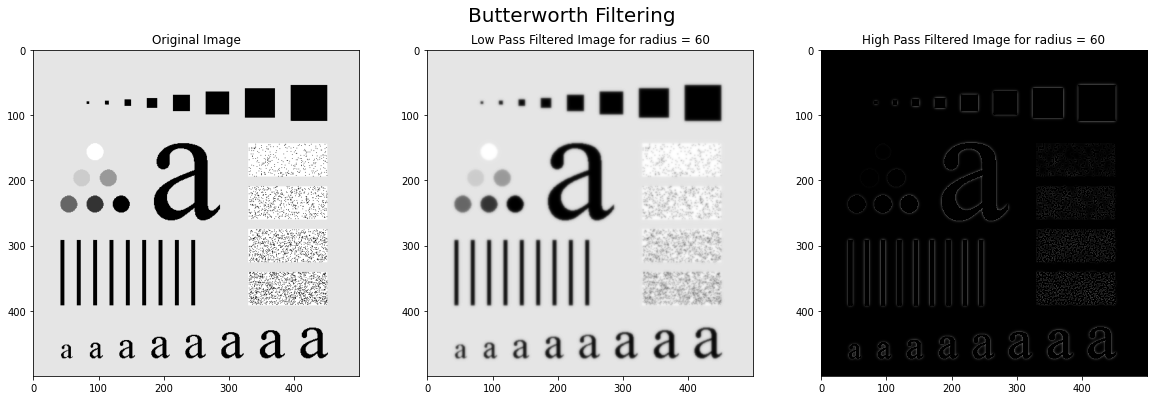

In [13]:
#display the results
plt.figure(figsize=(20,6))
plt.suptitle('Butterworth Filtering', fontsize=20)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(lpf_b, cmap='gray', vmin=0, vmax=255)
plt.title("Low Pass Filtered Image for radius = " +str(D0))

plt.subplot(1, 3, 3)
plt.imshow(hpf_b, cmap='gray', vmin=0, vmax=255)
plt.title("High Pass Filtered Image for radius = " +str(D0))

plt.show()

# ***Conclusion***
In this practical, we applied both ideal and butterworth filtering in the frequency domain. In the ideal filtering we notice that the in images there is some ringing which reduces as the value increases. This ringing does not occur in the butterworth filter. In butterworth filtering, the low pass image becomes blurr. We notice that as the cutoff value decreases the images becomes more blurry. Whereas in high pass filter image, as the value increases the edged become thinner and more difficult to notice.